In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
filepath = "../Data Preprocessing/iot23_combined.csv"

In [3]:
df = pd.read_csv(filepath)

In [4]:
del df['Unnamed: 0']

In [5]:
df

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,category,...,conn_state_SF,conn_state_SH,conn_state_SHR,service_-,service_dhcp,service_dns,service_http,service_irc,service_ssh,service_ssl
0,2.998796,0,0,0.0,3.0,180.0,0.0,0.0,1,Malware,...,0,0,0,1,0,0,0,0,0,0
1,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,1,Malware,...,0,0,0,1,0,0,0,0,0,0
2,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,1,Malware,...,0,0,0,1,0,0,0,0,0,0
3,2.998804,0,0,0.0,3.0,180.0,0.0,0.0,0,Benign,...,0,0,0,1,0,0,0,0,0,0
4,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,0,Benign,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739669,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,1,Malware,...,0,0,0,1,0,0,0,0,0,0
2739670,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,1,Malware,...,0,0,0,1,0,0,0,0,0,0
2739671,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,1,Malware,...,0,0,0,1,0,0,0,0,0,0
2739672,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,1,Malware,...,0,0,0,1,0,0,0,0,0,0


In [6]:
df.loc[(df.category == 'Malware'), 'category'] = 1
df.loc[(df.category == 'Benign'), 'category'] = 0
df['category'].value_counts()

1    2362709
0    2362709
Name: category, dtype: int64

In [6]:
RF = RandomForestClassifier(n_estimators=300,min_samples_leaf=10)

In [7]:
X = df[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'service_-', 'service_dhcp', 'service_dns', 'service_http', 'service_ssh', 'service_ssl', 'service_irc', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']].values
Y = df['label'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.2)
Y_train, Y_test = Y_train.astype(int), Y_test.astype(int)

In [8]:
type(Y_train)

numpy.ndarray

In [9]:
start = time.time()
print('program start...')
print()

RF_clasifier = RF.fit(X_train, Y_train)
print()

print('prediction:')
y_pred = RF_clasifier.predict(X_test)
print(y_pred)
print()

print('Score:')
score = RF_clasifier.score(X_test,Y_test)
print(score)

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...


prediction:
[1 1 1 ... 1 1 1]

Score:
0.7225309571390767
program end...

time cost: 
278.74542236328125 seconds


In [10]:
print("Classifiction Report :")
print(classification_report(Y_test, y_pred))

Classifiction Report :


/media/wuguo-buaa/LENOVO_USB_HDD/PycharmProjects/Machine_learning_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/wuguo-buaa/LENOVO_USB_HDD/PycharmProjects/Machine_learning_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.97      0.54      0.69     75302
           1       0.67      1.00      0.80    311713
           2       0.63      0.00      0.00    104388
           3       0.00      0.00      0.00         1
           4       1.00      0.81      0.89     52594
           5       1.00      0.12      0.21      2969
           6       0.98      1.00      0.99       832
           7       0.97      0.31      0.47       112
           8       0.76      0.87      0.81        15
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         1
          11       0.60      0.75      0.67         4
          12       0.00      0.00      0.00         1

    accuracy                           0.72    547935
   macro avg       0.58      0.41      0.43    547935
weighted avg       0.74      0.72      0.64    547935



/media/wuguo-buaa/LENOVO_USB_HDD/PycharmProjects/Machine_learning_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


IndexError: index 12 is out of bounds for axis 1 with size 12

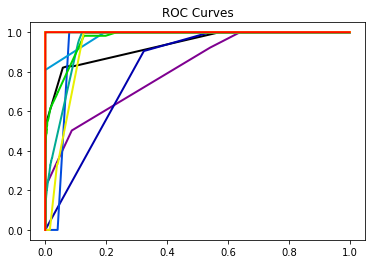

In [11]:
from sklearn.model_selection import cross_val_predict
import scikitplot as skplt
predicted_probas = RF_clasifier.predict_proba(X_test)
#ROC曲线
skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.savefig('./RF/PIC/model_mul_classification_roc.jpg')
#P-R曲线
skplt.metrics.plot_precision_recall_curve(Y_test, predicted_probas, cmap='nipy_spectral')
plt.savefig('./RF/PIC/model_mul_classification_pr.jpg')

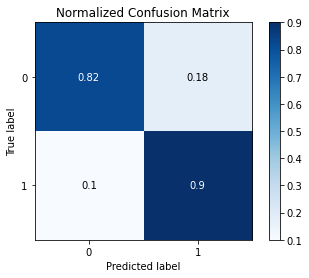

In [13]:
#混淆矩阵
predictions = cross_val_predict(RF_clasifier, X, Y.astype(int))
plot = skplt.metrics.plot_confusion_matrix(Y.astype(int), predictions, normalize=True)
plt.savefig('./RF/PIC/model_mul_classification_confusionMatrix.jpg')

In [14]:
import joblib
#lr是一个DT模型
joblib.dump(RF_clasifier, './RF/RF.model')
# DT = joblib.load('dt.model')

['./RF/RF.model']